---

# 🏆 **SFPPy Example: Mass Transfer from Chained Steps & Complex Scenarios**  
---

## 🔬 **Example 3: Advanced Migration Simulation with Variants**  
------------------------------------------------------  

### 🏭 **Scenario: Mass Transfer in a Multilayer Packaging System**  
--------------------------------------------------------  
This example simulates the migration of **🧪 limonene** from a recycled **polypropylene (PP) core**  
to food, using a **🛡️ trilayer packaging (ABA structure)** where **A = PET** and **B = PP**.  

📌 **The study follows three consecutive storage & processing steps:**  
1️⃣ **Storage at ambient temperature** 🌡️ **20°C** for **4 months**  
2️⃣ **Hot-filling** at **🔥 90°C** with a **fatty food**  
3️⃣ **Storage at 30°C** for **6 months**  

📊 **Initial Conditions:**  
- **Limonene** in **B**: **200 mg/kg**  
- **Layer thicknesses:**  
  - **PET (A)**: **📏 20 µm**  
  - **PP (B)**: **📏 500 µm**  

### 🔄 **Variants Studied:**  
- **🟠 Variant 1:** Replace **limonene** with **toluene**  
- **🟢 Variant 2:** Reduce **B’s thickness** from **20 µm** to **10 µm** (for both limonene & toluene)  
- **🔵 Variant 3:** **Combination of Variant 1 & Variant 2**  

📈 **All four conditions** (**Reference, Variant 1, Variant 2, and Variant 3**) are compared in a **single figure**,  
with results exported to **📂 Excel & 📜 CSV** for further analysis.  

---

## 📚 **Exploring SFPPy’s Database**  
--------------------------------------------------------  
This example allows interaction with **SFPPy’s extensive databases**, including:  
📦 **3D geometries** → Predefined packaging shapes  
🧪 **Chemical substances** → Millions via **PubChem**  
🥘 **Food contact conditions** → Various storage & processing scenarios  
🛡️ **Polymers & materials** → Tens of predefined types  

---

## 🛠 **Key Features & Pythonic Syntax**  
--------------------------------------------------------  

### 1️⃣ **Compact & Concise Code Structure**  
Example 3 demonstrates **chained simulations** with **minimal coding**, contrasting with Examples 1 & 2.  
The approach **stores results within objects**, enabling streamlined operations.  

### 2️⃣ **Operator `>>` for Seamless Processing**  
The `>>` operator automates:  
✅ **Property propagation**  
✅ **Mass transfer simulations**  

📌 **Examples of `>>` usage:**  
- `mypackaging >> myfood` → Updates **food geometry**  
- `food1 >> food2` → Synchronizes **food properties**  
- `myfood >> mymaterial` → Transfers **temperature**  
- `mymaterial >> myfood` → Simulates **mass transfer**  

📌 **Complete Chain Example:**  
```python
mypackaging >> myfood >> mymaterial >> myfood
```
1️⃣ **Update food geometry** to match packaging  
2️⃣ **Transfer temperature** to the material  
3️⃣ **Simulate mass transfer** from material to food  

📌 **For multiple contact conditions:**  
```python
mypackaging >> foodcontact2 >> foodcontact1 >> mymaterial >> foodcontact1 >> foodcontact2
```
- Adjusts food geometry (`foodcontact1`, `foodcontact2`)  
- Transfers **temperature** (`foodcontact1 >> mymaterial`)  
- Simulates **mass transfer** and propagates results  
- Final results stored in:  
  - 📊 **foodcontact1.lastsimulation**  
  - 📊 **foodcontact2.lastsimulation**  

📌 **Explicitly saving results:**  
```python
result = step_n >> step_n+1
```
📌 **Dynamic updates:**  
```python
foodcontact1 >> mymaterial.update(substance="new_migrant", l=new_thickness) >> foodcontact1
```

---

### 3️⃣ **Operator `+` for Combining Results**  
- **📦 Material assembly:** `ABA = A + B + A` (trilayer structure)  
- **📊 Merging simulation results:** `fullsolution = foodcontact1.lastsimulation + foodcontact2.lastsimulation`  

---

### 4️⃣ **Comprehensive Result Output**  
📈 **Visualization:** Results can be plotted directly  
📂 **Exporting:** Save to **📜 Excel (`.xlsx`)** and **CSV (`.csv`)**  

---

## 🔎 **Summary**  
--------------------------------------------------------  
Example 3 demonstrates **efficient chaining of migration simulations** using **intuitive operators**:  
- **`>>`** → for sequential processing  
- **`+`** → for merging results  

With **SFPPy’s powerful database** and **Pythonic syntax**, complex simulations become intuitive and efficient.  

---

📌 **Project:** SFPPy - 🛡️ SafeFoodPackaging Portal in Python Initiative  
👨‍💻 **Author:** INRAE\\olivier.vitrac@agroparistech.fr  
📜 **License:** MIT  

***

### Minimal Setup for SFPPy Core 🚀🔧⚙️

> This setup is designed to work on any machine – whether SFPPy is already installed or not.  

<details>
    <summary>Click to Expand</summary>
  
> The cell attempts to import the core module `patankar.loadpubchem`.  
> - If it **succeeds**, SFPPy is already initialized, and no further action is needed.  
> - If it **fails**, the cell will try to run the initialization script `initialize_sfppy.py` (searched from several candidate paths).  
>   - If the script is found, it will be executed.  
>   - If not, the repository will be cloned (or refreshed) and then initialized.
>  
> After successful initialization, the full path to the SFPPy installation folder is displayed.  
>  
> **Note:** Make sure you are in a directory with access to SFPPy (or that can clone it). In a read-only environment, this cell will help you set up SFPPy temporarily.

</details>

In [3]:
import sys, os
import ipywidgets as widgets
from IPython.display import display, HTML

verbose = True  # Set verbosity flag
clone = True # True enable cloning from GitHub repo

try:
    import patankar.loadpubchem
    if verbose: print("✅ SFPPy is already initialized; skipping initialization.")
except ImportError:
    if verbose: print("⚠️ SFPPy not detected; attempting initialization.")
    base_dirs = ["./SFPPy/utils", "../utils", "./utils", ".", "../../utils", "../../../utils"]
    # Find candidates for the initialization script in various base directories.
    candidates = [os.path.abspath(os.path.join(d, "initialize_sfppy.py"))
                  for d in base_dirs if os.path.exists(os.path.join(d, "initialize_sfppy.py"))]
    if candidates:
        if verbose: print(f"🔍 Running initialization script: {candidates[0]}")
        %run -i {candidates[0]} --no-verbose --no-cd
        try:
            import patankar.loadpubchem
            if verbose: print("✅ SFPPy successfully initialized.")
        except ImportError: print("❌ ERROR: Initialization failed; 'patankar.loadpubchem' is still unavailable.\n", "Current sys.path:\n", sys.path)
    elif clone:
        if not os.path.exists("SFPPy"):
            if verbose: print("📥 SFPPy repository not found. Cloning the repository – please be patient.")
            !git clone https://github.com/ovitrac/SFPPy.git  # First time: clone the repository
        else:
            if verbose: print("🔄 Refreshing the SFPPy repository.")
            !git -C SFPPy pull  # Subsequent times: update the repository if needed
        %cd SFPPy
        installationscript = os.path.abspath(os.path.join(os.getcwd(), "utils", "initialize_sfppy.py"))
        %run -i {installationscript} --no-verbose --no-cd
        try:
            import patankar.loadpubchem
            if verbose:
                print("✅ SFPPy successfully initialized.")
        except ImportError: print("❌ ERROR: Initialization failed; 'patankar.loadpubchem' is still unavailable.\n", "Current sys.path:\n", sys.path)
    else:
        raise FileNotFoundError("❌ ERROR: Either set clone=True or start the notebook from a valid SFPPy installation.\n")

SFPPymainfolder = os.path.abspath(os.path.join(os.path.dirname(patankar.loadpubchem.__file__), ".."))
print("📁 SFPPy installation folder:", SFPPymainfolder)
from utils.nbutils import create_header_footer   # SFPPy utilities for notebooks
(header,footer,separator) = create_header_footer(title="SFPPy - Notebook 📑",what="all"); display(header);

⚠️ SFPPy not detected; attempting initialization.
🔍 Running initialization script: /home/olivi/natacha/python/utils/initialize_sfppy.py
✅ SFPPy successfully initialized.
📁 SFPPy installation folder: /home/olivi/natacha/python


### **Output directory to save/print results**

In [5]:
outputfolder = os.path.join(os.getcwd(), "tmp")  # Full path
os.makedirs(outputfolder, exist_ok=True)  # Create folder if missing
print("the output folder is:",outputfolder)
display(separator)

the output folder is: /home/olivi/natacha/python/notebooks/tmp


## 1 | **Review parameters**

### 1.1 | **Identify and select a suitable 3D packaging geometry.**

The function `help_geometry()` lists available shapes.

Example: `box_container` is a rectangular prism with one open face.

Its volume and surface area are computed as:
    Volume = length × width × height
    Surface Area = 2(lw + lh + wh) - lw  (removing the open top)

***

In [8]:
# Import the geometry module
from patankar.geometry import Packaging3D, help_geometry

# Display available geometries and required parameters
help_geometry()

=== List of Implemented Geometries & Synonyms ===

Shape Class: Cone
  Synonyms       : cone
  Required Params: radius, height
  Expected Keywords:
    Expected keywords for Cone:
      - radius: ['radius', 'r']
      - height: ['height', 'length', 'h', 'l']
  Documentation:
    A full cone with closed circular base.
    Volume = (1/3) π r² h. Surface area = base + lateral area.
------------------------------------------------------------
Shape Class: Cylinder
  Synonyms       : can, cylinder
  Required Params: radius, height
  Expected Keywords:
    Expected keywords for Cylinder:
      - radius: ['radius', 'r']
      - height: ['height', 'length', 'h', 'l']
  Documentation:
    A standard cylinder with top and bottom faces.
    Volume = π r² h. Surface area includes top and bottom disks.
------------------------------------------------------------
Shape Class: Hemisphere
  Synonyms       : bowl, halfsphere, hemisphere
  Required Params: radius
  Expected Keywords:
    Expected keywor

***

### 1.2 | **Define the container as an open rectangular prism**

In [10]:
container = Packaging3D('box_container', height=(8, "cm"), width=(10, "cm"), length=(19, "cm"))
# display the container
repr(container)

Connector(name='open_prism1_top', area=0.019 m², axis=(0.00, 0.00, 1.00))
OpenPrism1(
  Dimensions: length=0.19 m, width=0.1 m, height=0.08 m
  Volume: 0.00152 m³
  Surface Area: 0.0654 m²
  Connectors:
  - <Connector: open_prism1_top>
)
Packaging3D(geometry_name='box_container', shape=
<OpenPrism1 with 1 connector>)


'<Packaging3D: box_container>'

***

### 1.3 | **Retrieve the properties of the migrating substance.**

In [12]:
from patankar.loadpubchem import migrant

# Search for limonene in PubChem and retrieve chemical properties.
m = migrant("limonene")

# display the migrant
repr(m)

<migrant object>
    Compound: limonene
        Name: ['turpentine oil ter [...] p-Mentha-1,8-diene']
         cid: 22311
         CAS: ['7705-14-8', '138-86-3']
     M (min): 136.23
     M_array: [136.23]
     formula: C10H16
      smiles: CC1=CCC(CC1)C(=C)C
    InChiKey: XMGQYMWWDOXHJM-UHFFFAOYSA-N
        logP: [3.4]
   P' (calc): [0.]


'<migrant: turpenti [...] fraction - M=136.23 g/mol>'

***

### 1.4 | **List available polymer/material options for packaging.**

Use `help_layer()` to display predefined materials.

<details>
    <summary>Click to expand the list</summary>
    
| Class Name              | Type     | Material                        | Code    |
|-------------------------|----------|---------------------------------|---------|
| AdhesiveAcrylate        | adhesive | acrylate adhesive               | Acryl   |
| AdhesiveEVA             | adhesive | EVA adhesive                    | EVA     |
| AdhesiveNaturalRubber   | adhesive | natural rubber adhesive         | rubber  |
| AdhesivePU              | adhesive | polyurethane adhesive           | PU      |
| AdhesivePVAC            | adhesive | PVAc adhesive                   | PVAc    |
| AdhesiveSyntheticRubber | adhesive | synthetic rubber adhesive       | sRubber |
| AdhesiveVAE             | adhesive | VAE adhesive                    | VAE     |
| Cardboard               | paper    | cardboard                       | board   |
| HDPE                    | polymer  | high-density polyethylene       | HDPE    |
| HIPS                    | polymer  | high-impact polystyrene         | HIPS    |
| LDPE                    | polymer  | low-density polyethylene        | LDPE    |
| LLDPE                   | polymer  | linear low-density polyethylene | LLDPE   |
| PA6                     | polymer  | polyamide 6                     | PA6     |
| PA66                    | polymer  | polyamide 6,6                   | PA6,6   |
| PBT                     | polymer  | polybutylene terephthalate      | PBT     |
| PEN                     | polymer  | polyethylene naphthalate        | PEN     |
| PP                      | polymer  | isotactic polypropylene         | PP      |
| PPrubber                | polymer  | atactic polypropylene           | aPP     |
| PS                      | polymer  | polystyrene                     | PS      |
| Paper                   | paper    | paper                           | paper   |
| SBS                     | polymer  | styrene-based polymer SBS       | SBS     |
| air                     | air      | ideal gas                       | gas     |
| gPET                    | polymer  | glassy PET                      | PET     |
| oPP                     | polymer  | bioriented polypropylene        | oPP     |
| plasticizedPVC          | polymer  | plasticized PVC                 | pPVC    |
| rPET                    | polymer  | rubbery PET                     | rPET    |
| rigidPVC                | polymer  | rigid PVC                       | PVC     |
</details>

In [14]:
# Import material properties
from patankar.layer import help_layer, layer

# Display available polymer options
help_layer()

| Class Name              | Type     | Material                         | Code    |
|-------------------------|----------|----------------------------------|---------|
| AdhesiveAcrylate        | adhesive | acrylate adhesive                | Acryl   |
| AdhesiveEVA             | adhesive | EVA adhesive                     | EVA     |
| AdhesiveNaturalRubber   | adhesive | natural rubber adhesive          | rubber  |
| AdhesivePU              | adhesive | polyurethane adhesive            | PU      |
| AdhesivePVAC            | adhesive | PVAc adhesive                    | PVAc    |
| AdhesiveSyntheticRubber | adhesive | synthetic rubber adhesive        | sRubber |
| AdhesiveVAE             | adhesive | VAE adhesive                     | VAE     |
| Cardboard               | paper    | cardboard                        | board   |
| HDPE                    | polymer  | high-density polyethylene        | HDPE    |
| HIPS                    | polymer  | high-impact polystyrene          | HI

***

### 1.5 | **Import required polymer classes**
- Polypropylene
- gPET (glassy PET)
- wPET (plasticized PET in contact with food)

In [16]:
from patankar.layer import gPET, PP, wPET

***

### 1.6 | **Define and configure the layers for the multilayer packaging.**

#### Each layer has properties such as:

    - Thickness (`l`)
    - Initial concentration (`C0`)
    - Migrant type (`substance`, `migrant`, etc.)

#### Property synonyms:

| Parameter  | Synonyms                  |
|------------|---------------------------|
| substance  | molecule, solute, migrant |
| C0         | Cp0, CP0                  |
| l          | lp, lP                    |

***

### 1.7 | **Define the PET (A) and PP (B) layers**
> The assembly is performed using the operator `+`

In [19]:
Awet = wPET(l=(20, "um"), migrant=m, C0=0)   # 20 µm PET with no initial migrant (food side)
B = PP(l=(0.5, "mm"), migrant=m, CP0=200)    # 500 µm PP with 200 mg/kg limonene
A = gPET(l=(20, "um"), migrant=m, C0=0)      # 20 µm PET with no initial migrant (food opposite side)


# Assemble the multilayer structure: ABA configuration
ABA = Awet + B + A # Awet is a plasticized 

# Display basic information (default temperature: 40°C)
print("\nOur ABA technology\n", repr(ABA))


[LAYER object version=1, contact=olivier.vitrac@agroparistech.fr]
3-multilayer of LAYER object:
-- [ layer 1 of 3 ] ---------- barrier rank=2 --------------
      name: "layer in wPET"
      type: "polymer"
  material: "plasticized PET"
      code: "PET"
   crystal: 0.35
        Tg: 46 [degC]
         l: 2e-05 [meter]
         D: 5.241e-16 [m**2/s]
          = Dpiringer(wPET,<migrant: turpenti [...] fraction - M=136.23 g/mol>,T=40.0 degC)
         k: 0.8452 [a.u.]
          = kFHP(<ethylene terephthalate>,<migrant: turpenti [...] fraction - M=136.23 g/mol>)
        C0: 0 [a.u.]
         T: 40 [degC]
-- [ layer 2 of 3 ] ---------- barrier rank=3 --------------
      name: "layer in PP"
      type: "polymer"
  material: "isotactic polypropylene"
      code: "PP"
   crystal: 0.5
        Tg: 0 [degC]
         l: 0.0005 [meter]
         D: 4.258e-13 [m**2/s]
          = Dpiringer(PP,<migrant: turpenti [...] fraction - M=136.23 g/mol>,T=40.0 degC)
         k: 4.322 [a.u.]
          = kFHP(<

***

### 1.8 | **Define different storage and processing conditions.**

Use `help_food()` to display available predefined food-contact scenarios.

<details>
    <summary>Click to expand the list</summary>summary>
    
| Class Name       | Name                 | Description          | Level    | Inheritance          | Init Params          |
|------------------|----------------------|----------------------|----------|----------------------|----------------------|
| foodphysics      | food physics         | Root physics class   | base     | object               |                      |
|                  |                      | used to implement    |          |                      |                      |
|                  |                      | food and mass        |          |                      |                      |
|                  |                      | transfer physics     |          |                      |                      |
| aqueous          | aqueous contact      | minimize mass        | root     | chemicalaffinity     | k                    |
|                  |                      | transfer             |          |                      |                      |
| chemicalaffinity | undefined            | default chemical     | root     | foodphysics          | k                    |
|                  |                      | affinity             |          |                      |                      |
| fat              | fat contact          | maximize mass        | root     | chemicalaffinity     | k                    |
|                  |                      | transfer             |          |                      |                      |
| foodlayer        | generic food layer   | root food class      | root     | foodphysics          | volume, surfacearea, |
|                  |                      |                      |          |                      | density, CF0,        |
|                  |                      |                      |          |                      | contacttime          |
| intermediate     | intermediate         | intermediate         | root     | chemicalaffinity     | k                    |
|                  |                      | chemical affinity    |          |                      |                      |
| liquid           | liquid food          | liquid food products | root     | texture              | h                    |
| nofood           | undefined            | impervious boundary  | root     | foodphysics          | h                    |
|                  |                      | condition            |          |                      |                      |
| perfectlymixed   | perfectly mixed      | maximize mixing,     | root     | texture              | h                    |
|                  | liquid               | minimize the mass    |          |                      |                      |
|                  |                      | transfer boundary    |          |                      |                      |
|                  |                      | layer                |          |                      |                      |
| realcontact      | contact conditions   | real storage         | root     | foodphysics          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| semisolid        | solid food           | solid food products  | root     | texture              | h                    |
| setoff           | setoff               | periodic boundary    | root     | foodphysics          | h                    |
|                  |                      | conditions           |          |                      |                      |
| testcontact      | migration testing    | migration testing    | root     | foodphysics          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| texture          | undefined            | default class        | root     | foodphysics          | h                    |
|                  |                      | texture              |          |                      |                      |
| foodproperty     | generic food layer   | root food class      | property | foodlayer            | volume, surfacearea, |
|                  |                      |                      |          |                      | density, CF0,        |
|                  |                      |                      |          |                      | contacttime          |
| realfood         | generic food layer   | real food class      | property | foodproperty         | volume, surfacearea, |
|                  |                      |                      |          |                      | density, CF0,        |
|                  |                      |                      |          |                      | contacttime          |
| simulant         | generic food         | food simulant        | property | foodproperty         | volume, surfacearea, |
|                  | simulant             |                      |          |                      | density, CF0,        |
|                  |                      |                      |          |                      | contacttime          |
| solid            | solid food           | solid food products  | property | foodproperty         | volume, surfacearea, |
|                  |                      |                      |          |                      | density, h, CF0,     |
|                  |                      |                      |          |                      | contacttime          |
| ambient          | ambient              | ambient storage      | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| boiling          | boiling              | boiling conditions   | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| chilled          | ambient              | ambient storage      | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| frozen           | frrozen              | freezing storage     | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| frying           | frying               | frying conditions    | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| hotambient       | hot ambient          | hot ambient storage  | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| hotfilled        | hotfilled            | hot-filling          | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| hotoven          | hot oven             | hot oven conditions  | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| microwave        | microwave            | microwave-oven       | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| oven             | oven                 | oven conditions      | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| panfrying        | panfrying            | panfrying conditions | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| pasteurization   | pasteurization       | pasteurization       | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| sterilization    | sterilization        | sterilization        | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| transportation   | hot transportation   | hot transportation   | contact  | realcontact          | contacttemperature,  |
|                  |                      | storage conditions   |          |                      | contacttime          |
| acetonitrile     | acetonitrile         | acetonitrile         | user     | simulant,            | volume, surfacearea, |
|                  |                      |                      |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      |                      |          | aqueous              | CF0, contacttime     |
| ethanol          | ethanol              | ethanol = from pure  | user     | simulant,            | volume, surfacearea, |
|                  |                      | ethanol down to      |          | perfectlymixed, fat  | density, h, k, k0,   |
|                  |                      | ethanol 95%          |          |                      | CF0, contacttime     |
| ethanol50        | ethanol 50           | ethanol 50, food     | user     | simulant,            | volume, surfacearea, |
|                  |                      | simulant of dairy    |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      | products             |          | intermediate         | CF0, contacttime     |
| ethanol95        | ethanol              | ethanol = from pure  | user     | ethanol              | volume, surfacearea, |
|                  |                      | ethanol down to      |          |                      | density, h, k, k0,   |
|                  |                      | ethanol 95%          |          |                      | CF0, contacttime     |
| isooctane        | isooctane            | isooctane food       | user     | simulant,            | volume, surfacearea, |
|                  |                      | simulant             |          | perfectlymixed, fat  | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |
| methanol         | methanol             | methanol             | user     | simulant,            | volume, surfacearea, |
|                  |                      |                      |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      |                      |          | aqueous              | CF0, contacttime     |
| oil              | olive oil            | olive oil food       | user     | oliveoil             | volume, surfacearea, |
|                  |                      | simulant             |          |                      | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |
| oliveoil         | olive oil            | olive oil food       | user     | simulant,            | volume, surfacearea, |
|                  |                      | simulant             |          | perfectlymixed, fat  | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |
| rolled           | rolled               | storage in rolls     | user     | setoff               | h                    |
| stacked          | stacked              | storage in stacks    | user     | setoff               | h                    |
| tenax            | Tenax                | simulant of dry food | user     | simulant, solid, fat | volume, surfacearea, |
|                  |                      | products             |          |                      | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |
| water            | water                | water food simulant  | user     | simulant,            | volume, surfacearea, |
|                  |                      |                      |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      |                      |          | aqueous              | CF0, contacttime     |
| water3aceticacid | water 3% acetic acid | water 3% acetic acid | user     | simulant,            | volume, surfacearea, |
|                  |                      | - simulant for       |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      | acidic aqueous foods |          | aqueous              | CF0, contacttime     |
| yogurt           | solid food           | yogurt               | user     | realfood, semisolid, | volume, surfacearea, |
|                  |                      |                      |          | ethanol50            | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |
</details>

In [21]:
from patankar.food import help_food
help_food()

| Class Name       | Name                 | Description          | Level    | Inheritance          | Init Params          |
|------------------|----------------------|----------------------|----------|----------------------|----------------------|
| foodphysics      | food physics         | Root physics class   | base     | object               |                      |
|                  |                      | used to implement    |          |                      |                      |
|                  |                      | food and mass        |          |                      |                      |
|                  |                      | transfer physics     |          |                      |                      |
| aqueous          | aqueous contact      | minimize mass        | root     | chemicalaffinity     | k                    |
|                  |                      | transfer             |          |                      |                      |
| chemic

***

### 1.9 | **Import relevant food-contact conditions**

In [23]:
from patankar.food import realfood, liquid, fat, ambient, hotfilled, stacked

***

### 1.10 | **Define three food-contact conditions**

In [25]:
class contact1(stacked, ambient):
    name = "1:setoff"
    contacttemperature = (20, "degC")
    contacttime = (3, "months")

class contact2(hotfilled, realfood, liquid, fat):
    name = "2:hotfilling"

class contact3(ambient, realfood, liquid, fat):
    name = "3:storage"
    contacttime = (6, "months")

# Instantiate food-contact conditions
medium1 = contact1(contacttime=(4, "months"))  # Adjust time
medium2 = contact2()
medium3 = contact3()

# Display the three conditions
[print(repr(m),'\n') for m in (medium1,medium2,medium3)]
display(separator)

Food object "1:setoff" (storage in stacks) with properties:
contacttemperature: 20 [degC]
       contacttime: 10519200 [second]
<contact1: 1:setoff> 

Food object "2:hotfilling" (hot-filling conditions) with properties:
               CF0: 0 [a.u.]
contacttemperature: 80 [degC]
       contacttime: 1200 [second]
           density: 1000 [kilogram / meter ** 3]
                 h: 1e-06 [meter / second]
       surfacearea: 0.06 [meter ** 2]
            volume: 0.001 [meter ** 3]
<contact2: 2:hotfilling> 

Food object "3:storage" (ambient storage conditions) with properties:
               CF0: 0 [a.u.]
contacttemperature: 25 [degC]
       contacttime: 15778800 [second]
           density: 1000 [kilogram / meter ** 3]
                 h: 1e-06 [meter / second]
       surfacearea: 0.06 [meter ** 2]
            volume: 0.001 [meter ** 3]
<contact3: 3:storage> 



## 2 | **Chaining Simulations**

### 2.1 | **Use the `>>` operator to propagate the packaging properties (volume, surface area) to all food-contact conditions.**

#### Example:
    container >> medium1 >> medium2 >> medium3

In [28]:
container >> medium1 >> medium2 >> medium3

Food object "3:storage" (ambient storage conditions) with properties:
               CF0: 0 [a.u.]
contacttemperature: 25 [degC]
       contacttime: 15778800 [second]
           density: 1000 [kilogram / meter ** 3]
                 h: 1e-06 [meter / second]
       surfacearea: 0.0654 [meter ** 2]
            volume: 0.00152 [meter ** 3]


<contact3: 3:storage>

***

### 2.2 | **Chain operations using `>>`**:
1. Transfer temperature from `medium1` to `ABA`
2. Simulate mass transfer from `ABA` to `medium1`

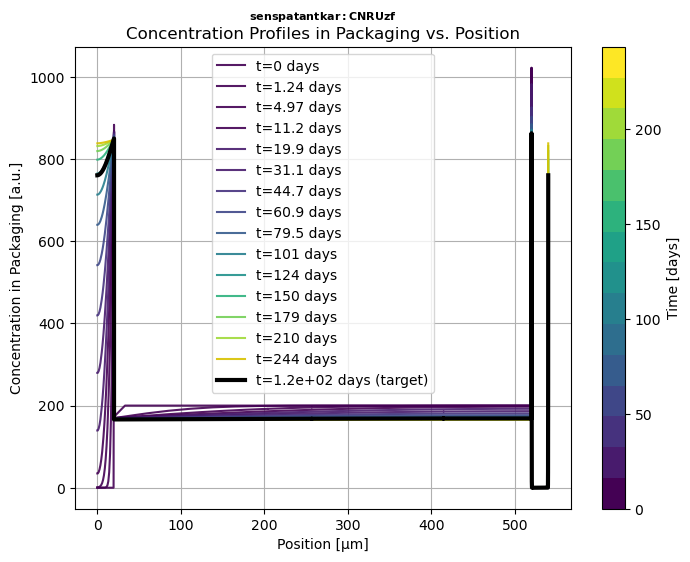

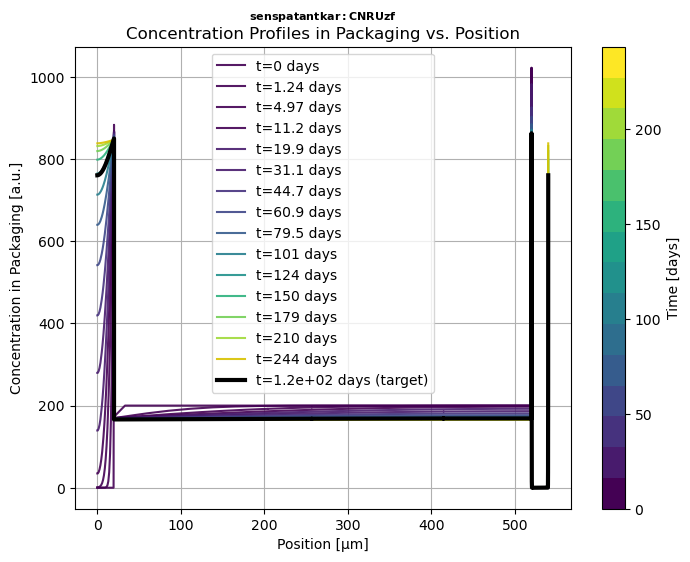

In [30]:
medium1 >> ABA
medium1 >> ABA >> medium1

# Verify simulation results
medium1.lastsimulation.plotCx()

***

### 2.3 | **Continue simulation by chaining**
    medium1 >> ABA >> medium1 >> medium2 >> medium3

In [32]:
medium1 >> ABA >> medium1 >> medium2 >> medium3

SensPatankarResult: senspatantkar:CNRUzf
	 <no description>
	 - with 1000 time steps
 	 - with 1800 spatial points
	 - Time range: [0.00e+00, 3.16e+07] s
	 - Position range: [0.00e+00, 5.40e-04] m


<SensPatankarResult:senspatantkar:CNRUzf: CF(182.6 [days]) = 1.195 [a.u.]>

***


### 2.4 | **All results are stored in** `lastsimulation`
    medium1.lastsimulation, medium2.lastsimulation, medium3.lastsimulation

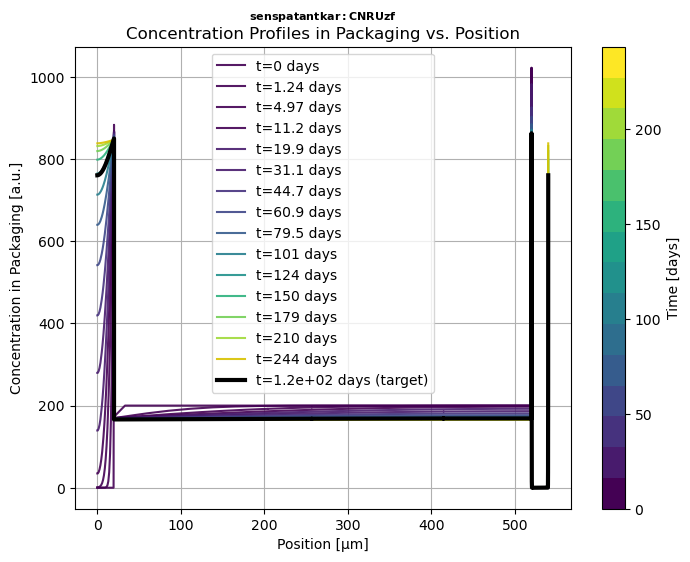

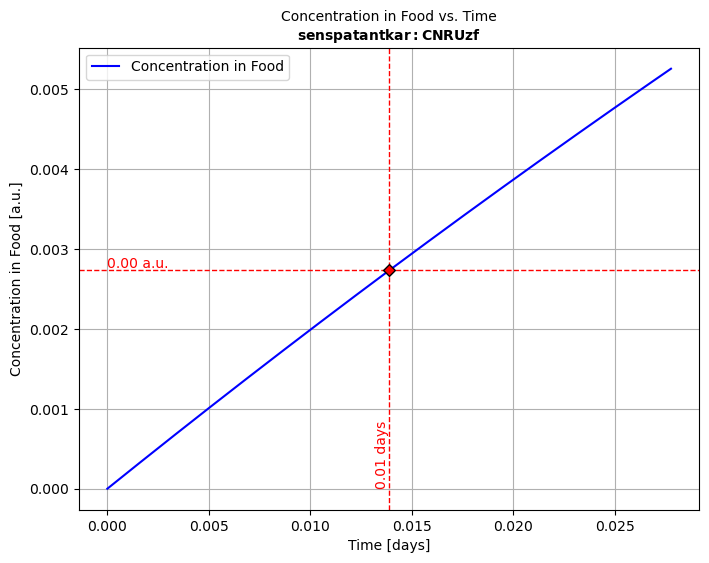

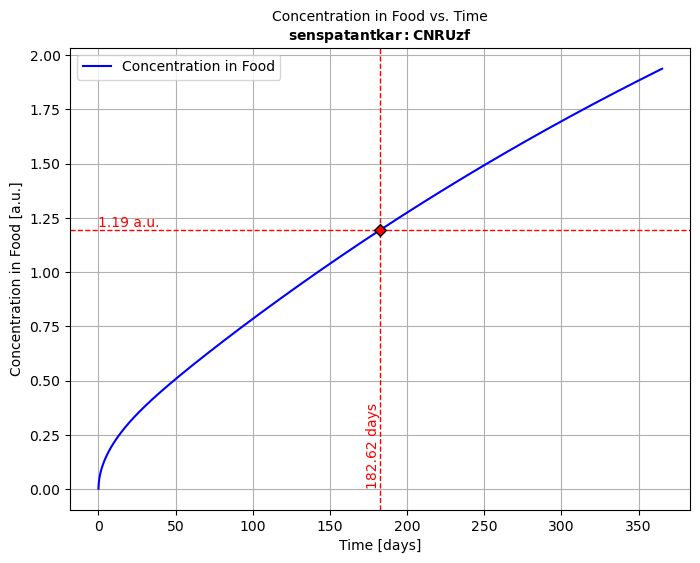

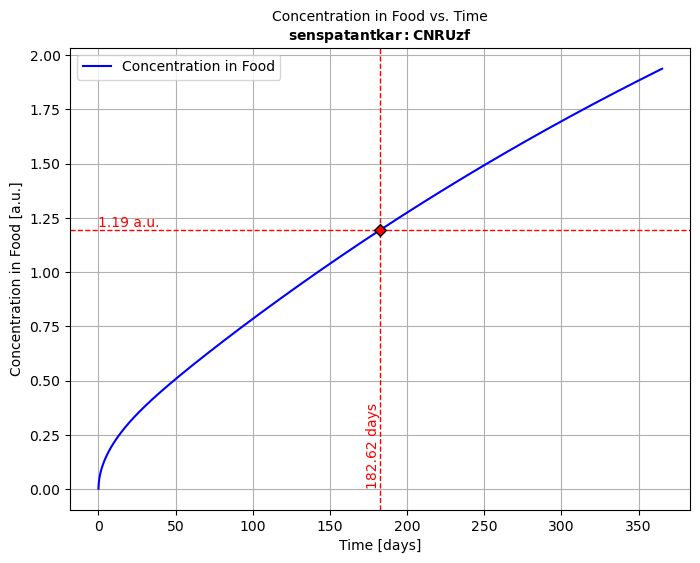

In [34]:
# Plot migration kinetics
medium1.lastsimulation.plotCx()
medium2.lastsimulation.plotCF()
medium3.lastsimulation.plotCF()

***

### 2.5 | **Use `+` operator to merge kinetic profiles.**

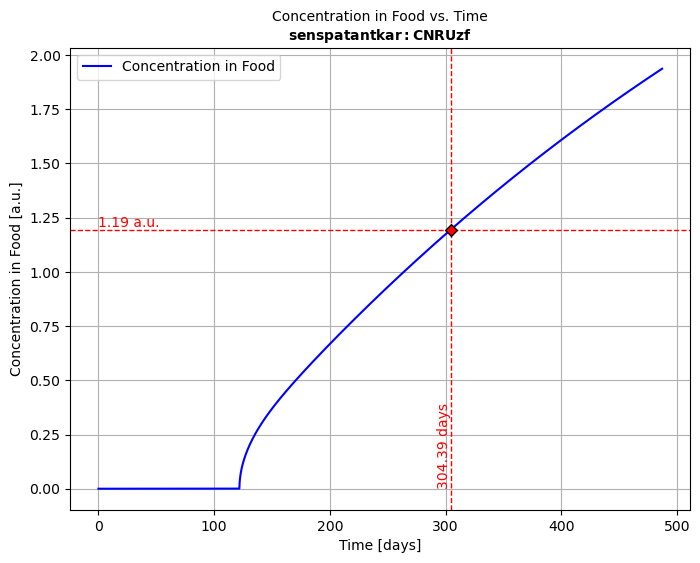

In [36]:
sol123 = medium1.lastsimulation + medium2.lastsimulation + medium3.lastsimulation
sol123.plotCF()
display(separator)

## 3 | **Repeat all steps with toluene instead of limonene.**

⚠️Warning: No 🇪🇺10/2011/EC record found for PubChem cid 1140.
<migrant object>
    Compound: toluene
        Name: ['SR-01000944565', ' [...]  waste number U220']
         cid: 1140
         CAS: ['108-88-3', '25013-04-1']
     M (min): 92.14
     M_array: [92.14]
     formula: C7H8
      smiles: CC1=CC=CC=C1
    InChiKey: YXFVVABEGXRONW-UHFFFAOYSA-N
        logP: [2.7]
   P' (calc): [1.23097093]


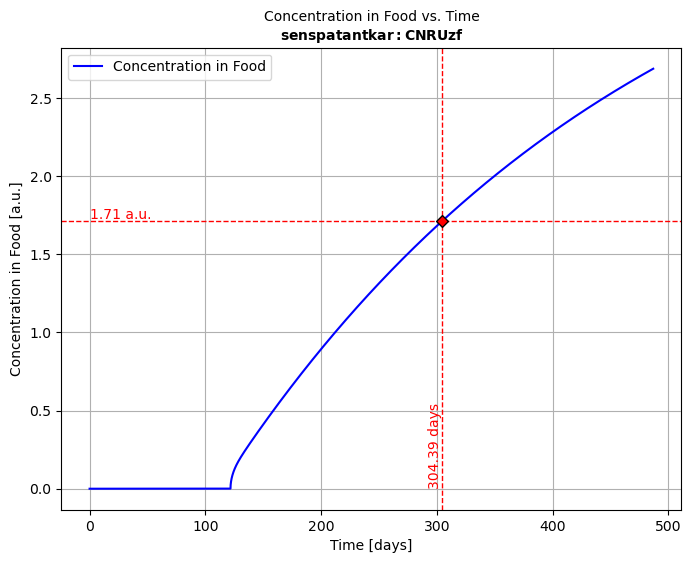

In [38]:
m2 = migrant("toluene")  # Retrieve new migrant
repr(m2) # display m2

# Restart the simulation pipeline with updated migrant
medium1 @ ABA.update(solute=m2) >> medium1 >> medium2 >> medium3

# Store results
sol123_variant1 = medium1.lastsimulation + medium2.lastsimulation + medium3.lastsimulation
sol123_variant1.plotCF()
display(separator)

## 4 | **Halve the thickness of the first and last layers (A) while keeping PP constant.**

In [40]:
refthickness = ABA.l.copy()
newthickness = refthickness
newthickness[[0, -1]] /= 2  # Reduce thickness of A layers (index 0=first layer in contact with food, index -1= last layer)

# Restart simulation with modified structure
medium1 >> ABA.copy(l=newthickness, migrant=m) >> medium1 >> medium2 >> medium3
sol123_variant2 = medium1.lastsimulation + medium2.lastsimulation + medium3.lastsimulation

---

#### Use both modifications:
- Toluene as the migrant
- Reduced PET layer thickness

Here @ replaces the first `>>`, they are equivalent **but its usage is depreciated since v. 1.32.**

In [42]:
medium1 @ ABA.copy(l=newthickness, migrant=m2) >> medium1 >> medium2 >> medium3
sol123_variant3 = medium1.lastsimulation + medium2.lastsimulation + medium3.lastsimulation
display(separator)

## 4 | **Store and compare all solutions using `CFSimulationContainer`.**

<CFSimulationContainer: Stored CF Curves>
--------------------------------------------------
[0] Label: Limonene-FB = 20 µm (ref) | Time: [0.00e+00, 4.21e+07] s | Color: dodgerblue | Style: - | Width: 3
[1] Label: Toluene-FB = 20 µm (v1) | Time: [0.00e+00, 4.21e+07] s | Color: orangered | Style: - | Width: 3
[2] Label: Limonene-FB = 10 µm (v2) | Time: [0.00e+00, 4.21e+07] s | Color: deepskyblue | Style: - | Width: 2
[3] Label: Toluene-FB = 10 µm (v3) | Time: [0.00e+00, 4.21e+07] s | Color: tomato | Style: - | Width: 2



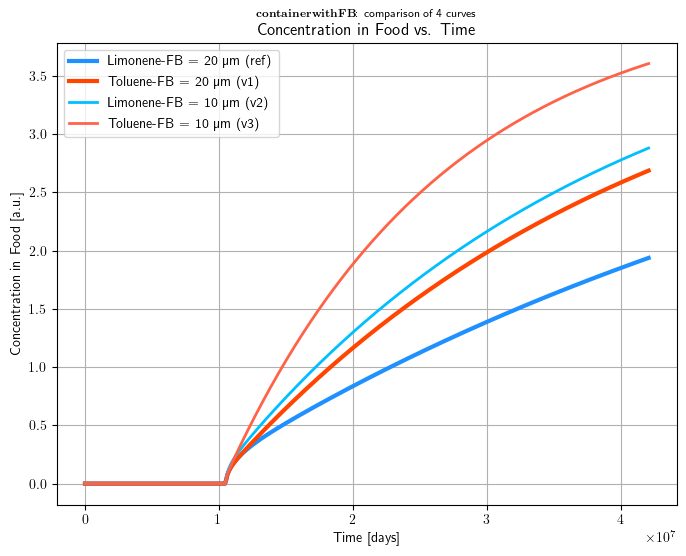

In [44]:
from patankar.migration import CFSimulationContainer as store

# Initialize collection
collection = store(name="container with FB")

# Add results to collection
collection.add(sol123, "Limonene-FB = 20 µm (ref)", "dodgerblue", linewidth=3)
collection.add(sol123_variant1, "Toluene-FB = 20 µm (v1)", "orangered", linewidth=3)
collection.add(sol123_variant2, "Limonene-FB = 10 µm (v2)", "deepskyblue", linewidth=2)
collection.add(sol123_variant3, "Toluene-FB = 10 µm (v3)", "tomato", linewidth=2)

# Display the collection
print(repr(collection))

# Plot comparative migration kinetics
collection_fig = collection.plotCF()
display(separator)

## 5 | **Save simulation results for further analysis.**

In [46]:
printconfig = {"destinationfolder": outputfolder, "overwrite": True}
collection_fig.print(**printconfig)

# Export data
collection.save_as_csv(filename="example3.csv", destinationfolder=outputfolder, overwrite=True)

# saving to Excel requires: openpyxl >= 3.0.10
# (install it with `conda install openpyl` if you encounter an error message)
collection.save_as_excel(filename="example3.xlsx", destinationfolder=outputfolder, overwrite=True)
display(separator,footer)

no valid figure
Saved CSV file: /home/olivi/natacha/python/notebooks/tmp/example3.csv
Saved Excel file: /home/olivi/natacha/python/notebooks/tmp/example3.xlsx
